UML:

1. EDA
2. Clean the data
3. Visualisations
4. Clustering (Dimensionality reduction (PCA/SVD))
5. Matrix (Her skal man labelencode)
6. Define your function  - Create interface


SML:

1. EDA (Look at the data) (Make plots that makes sense for the data)
2. Clean the data (Missing values, duplicates, etc.)
3. Visualisations (Look for imbalances)
4. Cite your model (Classification or regression) (Hvad kan man få ud af dataet)
5. Feature engineering (Add features, filter, standardise, encode, etc.)
6. Test out models (at least 3)
7. Evaluate the model (This is critical) (Har man brugt classification, her skal man bruge confusion matrix) (Feature importance, shap values)
8. Create app/interface

(Remember hyper parameters(Black box))


# EDA (Exploratory Data Analysis)

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### WARNINGS!!!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [210]:
file_path = 'https://raw.githubusercontent.com/SeniorHreff/Mushrooms_Exam/main/mushrooms_dataset.csv'

> Datasættet indhentes fra vores Github repository

In [211]:
df = pd.read_csv(file_path)

> Datasættet indlæses og defineres som 'df'

In [212]:
# Vi omdøber alle variable således at vi har færre problemer senere i SML delen
map_poisonous = {'e':'eadible', 'p':'poisonous'}
df.replace({'class':map_poisonous}, inplace = True)
map_cap_shape = {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'}
df.replace({'cap-shape':map_cap_shape}, inplace = True)
map_cap_surface = {'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'}
df.replace({'cap-surface':map_cap_surface}, inplace = True)
map_cap_color = {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'}
df.replace({'cap-color':map_cap_color}, inplace = True)
map_bruises = {'t':'bruises', 'f':'no'}
df.replace({'bruises':map_bruises}, inplace = True)
map_odor = {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pudgent', 's':'spicy'}
df.replace({'odor':map_odor}, inplace = True)
map_gill_attachment = {'a':'attached', 'd':'descending', 'f':'free', 'n':'notched'}
df.replace({'gill-attachment':map_gill_attachment}, inplace = True)
map_gill_spacing = {'c':'close', 'w':'crowded', 'd':'distant'}
df.replace({'gill-spacing':map_gill_spacing}, inplace = True)
map_gill_size = {'b':'broad', 'n':'narrow'}
df.replace({'gill-size':map_gill_size}, inplace = True)
map_gill_color = {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate','g':'gray', 'r':'green', 'o':'orange','p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'}
df.replace({'gill-color':map_gill_color}, inplace = True)
map_stalk_shape = {'e':'enlarging', 't':'tapering'}
df.replace({'stalk-shape':map_stalk_shape}, inplace = True)
map_stalk_root = {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 'z':'rhizomorphs', 'r':'rooted', '?':'missing'}
df.replace({'stalk-root':map_stalk_root}, inplace = True)
map_stalk_surface_above_ring = {'f':'fibrous', 'k':'silky', 'y':'scaly', 's':'smooth'}
df.replace({'stalk-surface-above-ring':map_stalk_surface_above_ring}, inplace = True)
map_stalk_surface_below_ring = {'f':'fibrous', 'k':'silky', 'y':'scaly', 's':'smooth'}
df.replace({'stalk-surface-below-ring':map_stalk_surface_below_ring}, inplace = True)
map_stalk_color_above_ring = {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'}
df.replace({'stalk-color-above-ring':map_stalk_color_above_ring}, inplace = True)
map_stalk_color_below_ring = {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'}
df.replace({'stalk-color-below-ring':map_stalk_color_below_ring}, inplace = True)
map_veil_type = {'p':'partial', 'u':'universal'}
df.replace({'veil-type':map_veil_type}, inplace = True)
map_veil_color = {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'}
df.replace({'veil-color':map_veil_color}, inplace = True)
map_ring_number = {'n':'none', 'o':'one', 't':'two'}
df.replace({'ring-number':map_ring_number}, inplace = True)
map_ring_type = {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large', 'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'}
df.replace({'ring-type':map_ring_type}, inplace = True)
map_spore_print_color = {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'}
df.replace({'spore-print-color':map_spore_print_color}, inplace = True)
map_population = {'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 'v':'several', 'y':'solitary'}
df.replace({'population':map_population}, inplace = True)
map_habitat = {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'}
df.replace({'habitat':map_habitat}, inplace = True)

In [213]:
# Bindestrege (-) laves om til underscore (_) for at gøre programmeringsdelen nemmere for os selv
df = df.rename(columns={'cap-shape':'cap_shape',
                        'cap-surface':'cap_surface',
                        'cap-color':'cap_color',
                        'gill-attachment':'gill_attachment',
                        'gill-spacing':'gill_spacing',
                        'gill-size':'gill_size',
                        'gill-color':'gill_color',
                        'stalk-shape':'stalk_shape',
                        'stalk-root':'stalk_root',
                        'stalk-surface-above-ring':'stalk_surface_above_ring',
                        'stalk-surface-below-ring':'stalk_surface_below_ring',
                        'stalk-color-above-ring':'stalk_color_above_ring',
                        'stalk-color-below-ring':'stalk_color_below_ring',
                        'veil-type':'veil_type',
                        'veil-color':'veil_color',
                        'ring-number':'ring_number',
                        'ring-type':'ring_type',
                        'spore-print-color':'spore_print_color'
                        })

In [214]:
df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pudgent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,eadible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,eadible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pudgent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,eadible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [216]:
df.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

Vi tjekker om nogle af kolonnerne indeholder missing values eller NA

In [217]:
df['stalk_root'].unique()

array(['equal', 'club', 'bulbous', 'rooted', 'missing'], dtype=object)

> Vi ved fra ReadMe at der er missing values i 'stalk-root' kolonnen, og kan se at de variable er markeret med '?'

In [218]:
# df = df[df['stalk_root'] != 'missing']

> Vi bruger overstående kode til at fjerne alle rækker som indeholder '?' i 'stalk-root' kolonnen

In [219]:
# df.reset_index(drop=True, inplace=True)

> Vi fjerne alle variable med '?' i 'stalk-root' variablen, da de bliver defineret som Missing Values i Read.me

In [220]:
df.nunique()

class                        2
cap_shape                    6
cap_surface                  4
cap_color                   10
bruises                      2
odor                         9
gill_attachment              2
gill_spacing                 2
gill_size                    2
gill_color                  12
stalk_shape                  2
stalk_root                   5
stalk_surface_above_ring     4
stalk_surface_below_ring     4
stalk_color_above_ring       9
stalk_color_below_ring       9
veil_type                    1
veil_color                   4
ring_number                  3
ring_type                    5
spore_print_color            9
population                   6
habitat                      7
dtype: int64

> Vi er opmærksomme på at 'veil-type' kun har én unik obeservation, og kan komme til at skabe problemer, men det vurderes senere...

In [221]:
# cap_color_counts = df['cap_color'].value_counts()

# plt.bar(cap_color_counts.index, cap_color_counts.values, )
# plt.xlabel('Cap colors')
# plt.ylabel('Count')
# plt.title('Bar Plot of Cap colors')
# plt.show()

## Visualisation

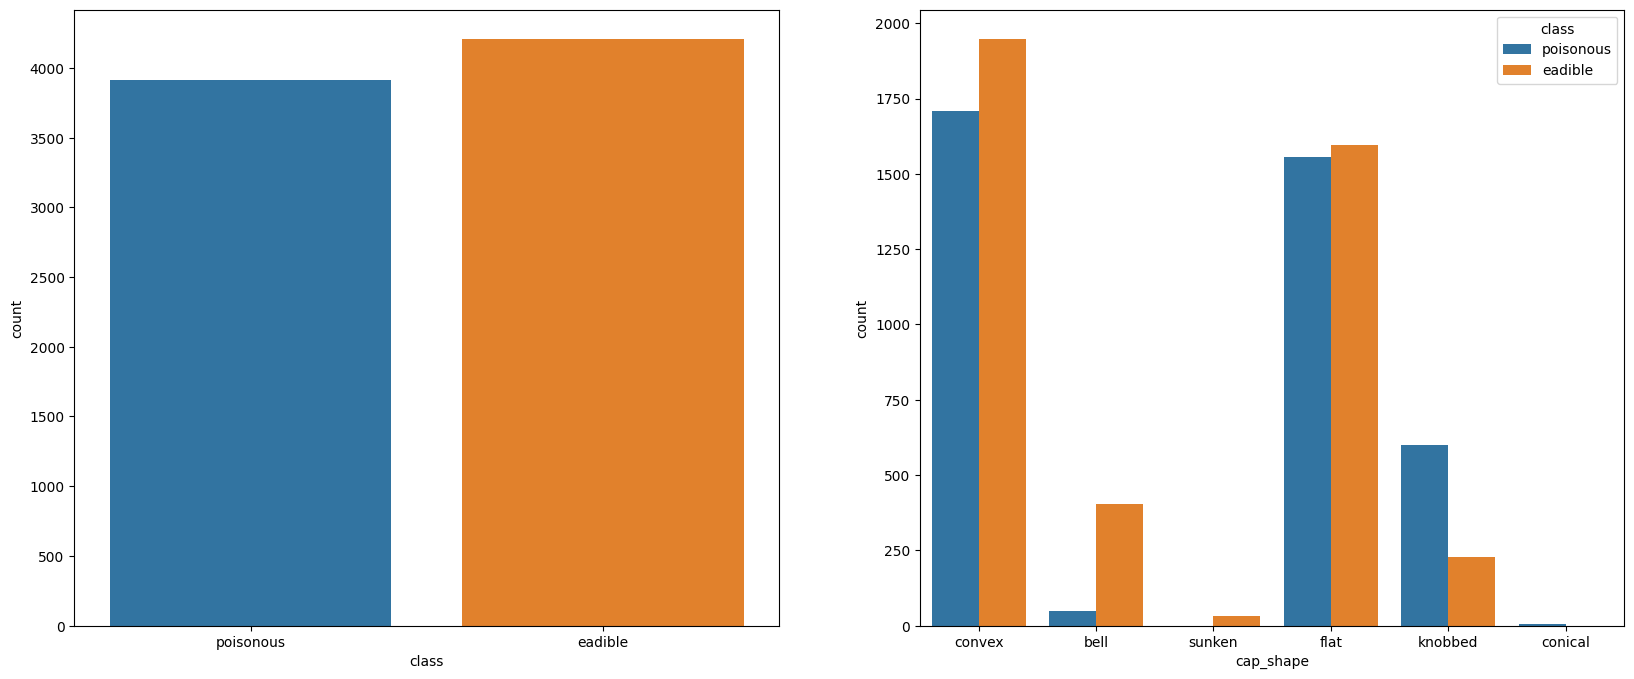

In [222]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,8))
sns.countplot(data = df, x = 'class', ax = ax1)
sns.countplot(data = df, x = 'cap_shape', hue = 'class', ax = ax2)
plt.show()

<Axes: xlabel='class', ylabel='count'>

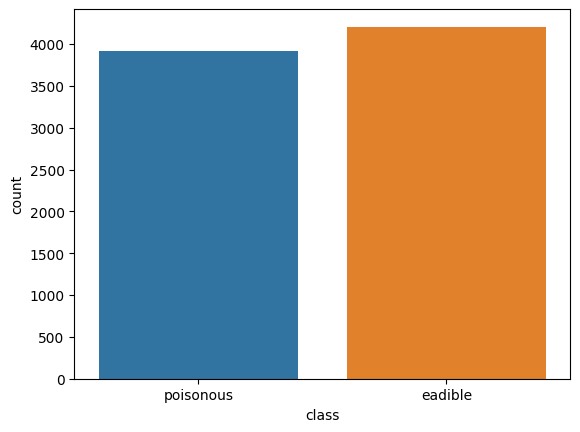

In [223]:
sns.countplot(data = df, x = 'class')

<Axes: xlabel='cap_shape', ylabel='count'>

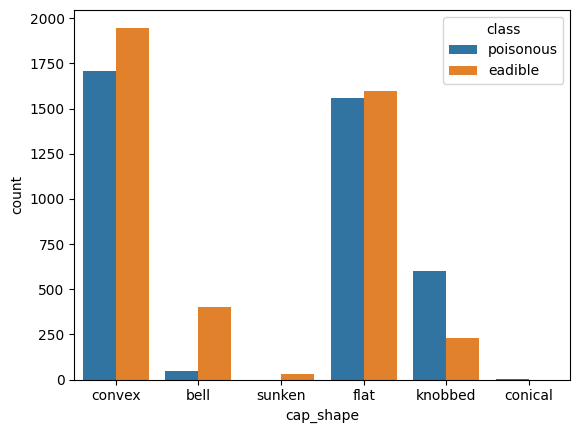

In [224]:
sns.countplot(data = df, x = 'cap_shape', hue = 'class')

In [225]:
# sns.countplot(data = df, x = 'cap_surface', hue = 'class')

<Axes: xlabel='cap_color', ylabel='count'>

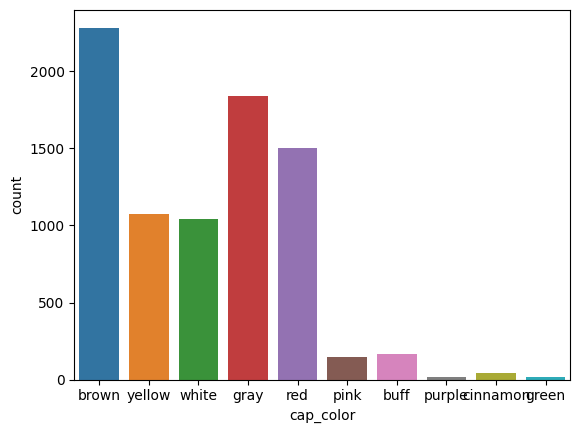

In [226]:
sns.countplot(data = df, x = 'cap_color')

<Axes: xlabel='odor', ylabel='count'>

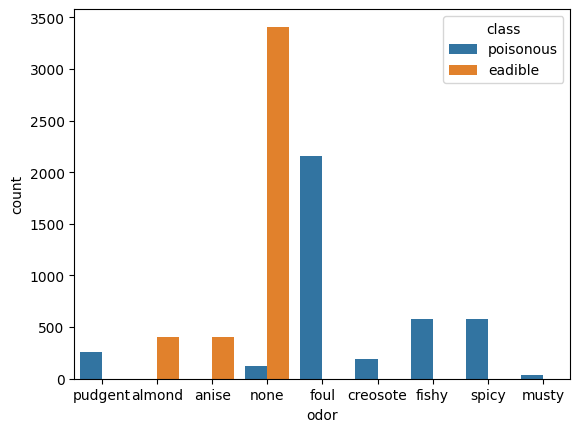

In [227]:
sns.countplot(data = df, x = 'odor', hue = 'class')

<Axes: xlabel='gill_color', ylabel='count'>

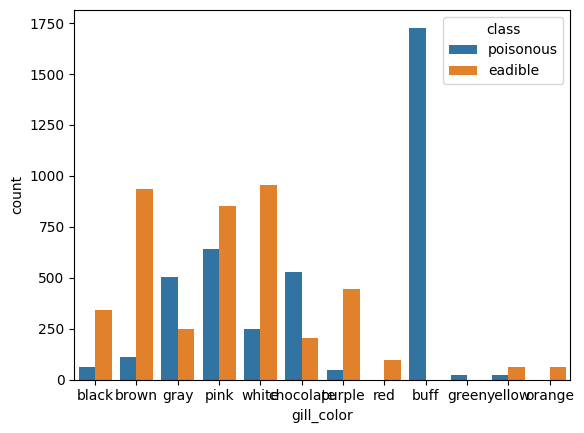

In [228]:
sns.countplot(data = df, x = 'gill_color', hue = 'class')

<Axes: xlabel='stalk_root', ylabel='count'>

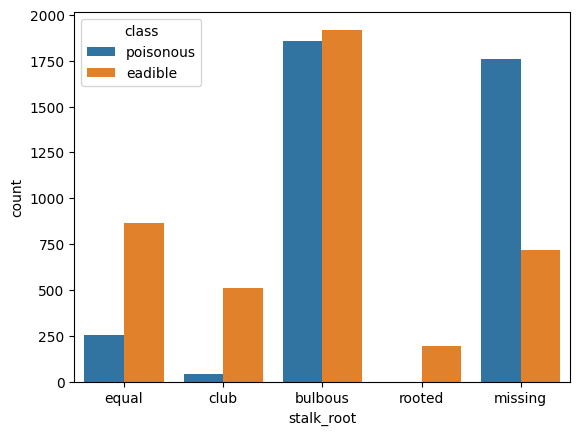

In [229]:
sns.countplot(data = df, x = 'stalk_root', hue = 'class')

<Axes: xlabel='stalk_surface_above_ring', ylabel='count'>

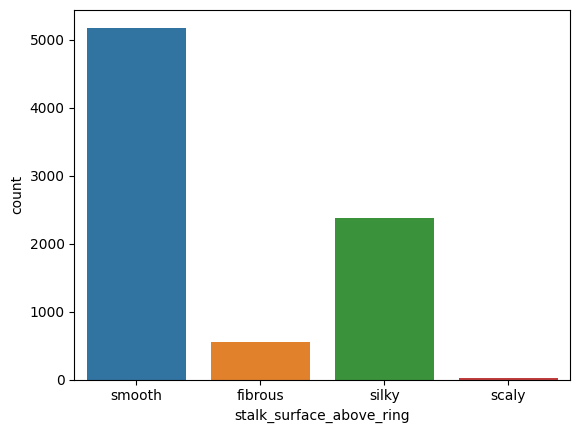

In [230]:
sns.countplot(data = df, x = 'stalk_surface_above_ring')

<Axes: xlabel='stalk_surface_below_ring', ylabel='count'>

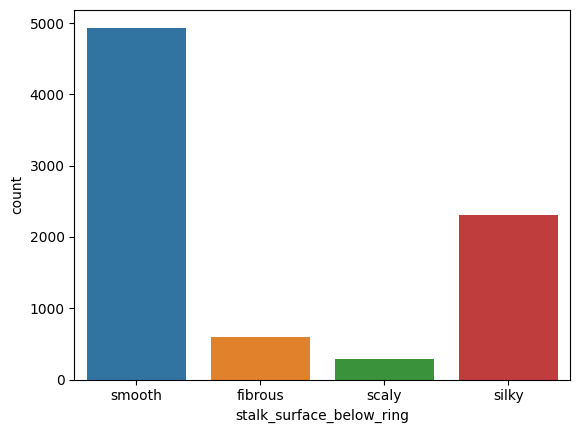

In [231]:
sns.countplot(data = df, x = 'stalk_surface_below_ring')

<Axes: xlabel='stalk_color_above_ring', ylabel='count'>

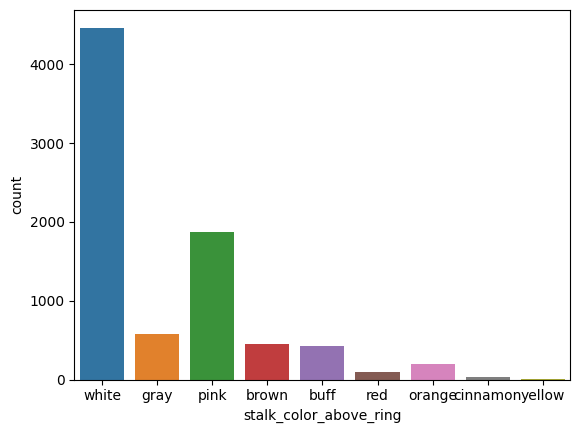

In [232]:
sns.countplot(data = df, x = 'stalk_color_above_ring')

<Axes: xlabel='stalk_color_below_ring', ylabel='count'>

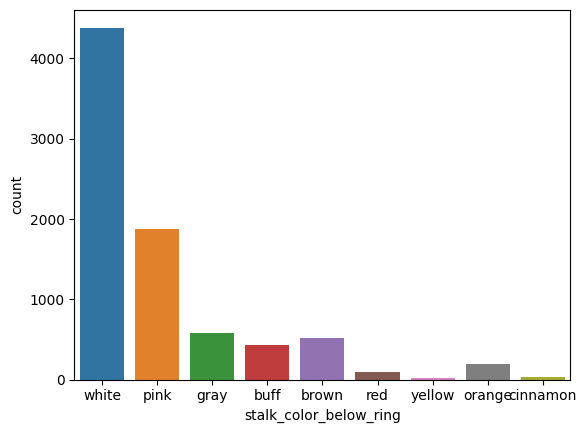

In [233]:
sns.countplot(data = df, x = 'stalk_color_below_ring')

<Axes: xlabel='veil_color', ylabel='count'>

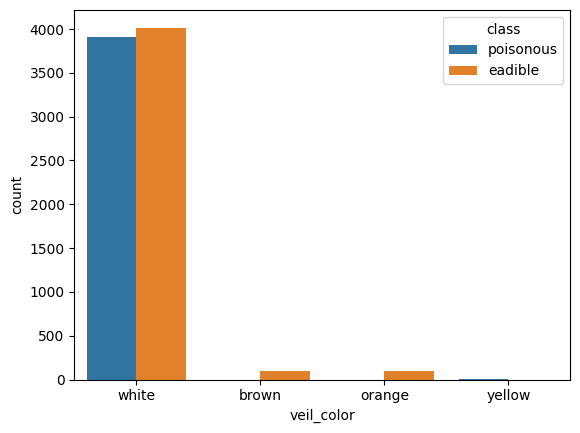

In [234]:
sns.countplot(data = df, x = 'veil_color', hue = 'class')

<Axes: xlabel='ring_number', ylabel='count'>

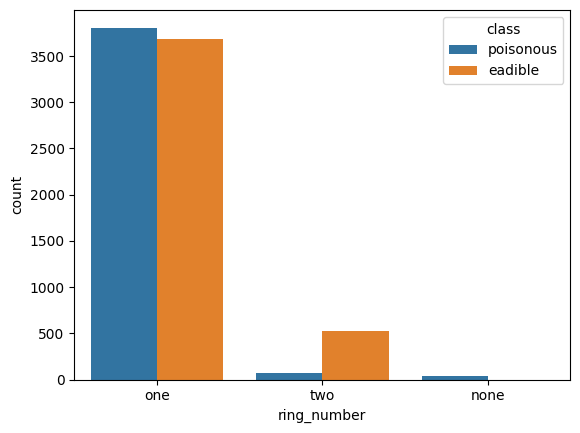

In [235]:
sns.countplot(data = df, x = 'ring_number', hue = 'class')

<Axes: xlabel='ring_type', ylabel='count'>

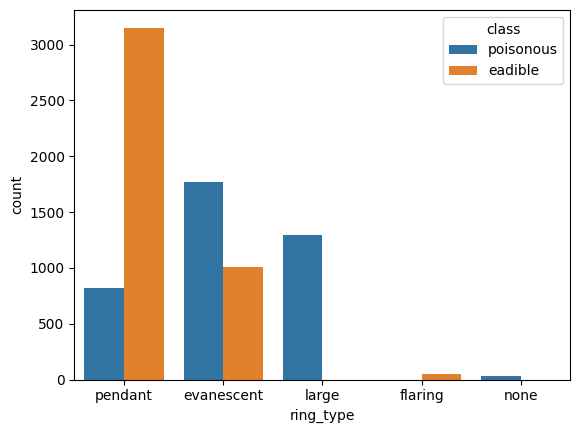

In [236]:
sns.countplot(data = df, x = 'ring_type', hue = 'class')

<Axes: xlabel='spore_print_color', ylabel='count'>

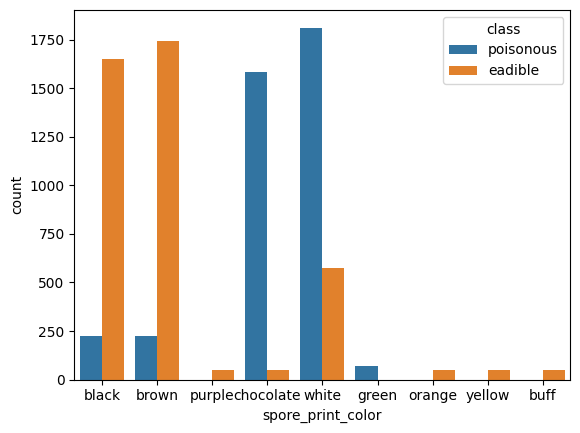

In [237]:
sns.countplot(data = df, x = 'spore_print_color', hue = 'class')

<Axes: xlabel='population', ylabel='count'>

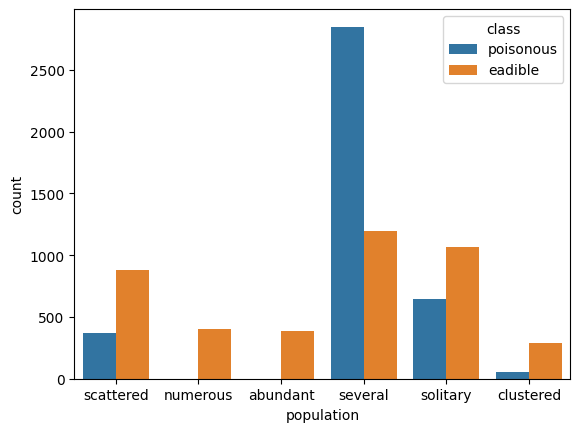

In [238]:
sns.countplot(data = df, x = 'population', hue = 'class')

<Axes: xlabel='habitat', ylabel='count'>

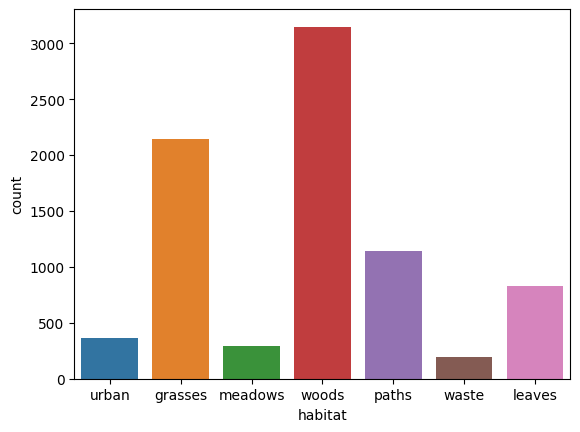

In [239]:
sns.countplot(data = df, x = 'habitat')

Text(0.5, 1.0, 'Pie Chart for class')

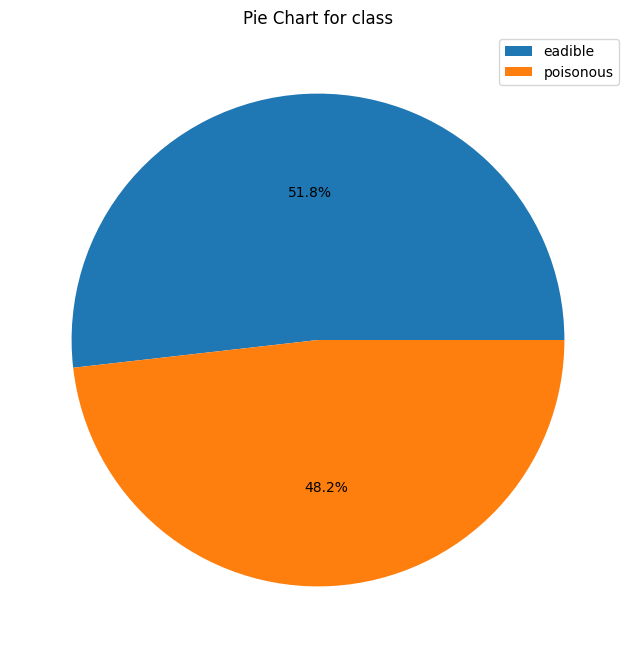

In [240]:
kolonne = 'class'

plt.figure(figsize=(8,8))
plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
plt.title('Pie Chart for '+ kolonne)

In [241]:
# kolonne = 'bruises'

# plt.figure(figsize=(8,8))
# plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
# plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
# plt.title('Pie Chart for '+ kolonne)

Text(0.5, 1.0, 'Pie Chart for gill_attachment')

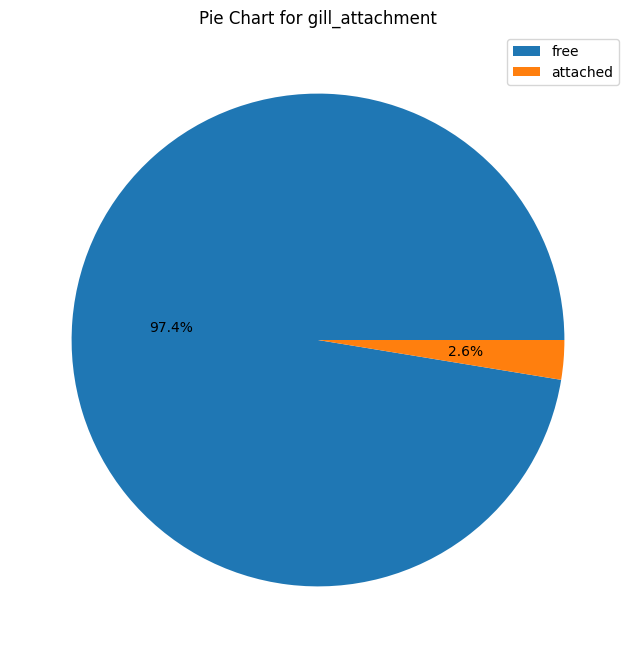

In [242]:
kolonne = 'gill_attachment'

plt.figure(figsize=(8,8))
plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
plt.title('Pie Chart for '+ kolonne)

In [243]:
# kolonne = 'gill_spacing'

# plt.figure(figsize=(8,8))
# plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
# plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
# plt.title('Pie Chart for '+ kolonne)

In [244]:
# kolonne = 'gill_size'

# plt.figure(figsize=(8,8))
# plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
# plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
# plt.title('Pie Chart for '+ kolonne)

In [245]:
# kolonne = 'stalk_shape'

# plt.figure(figsize=(8,8))
# plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
# plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
# plt.title('Pie Chart for '+ kolonne)

Text(0.5, 1.0, 'Pie Chart for veil_type')

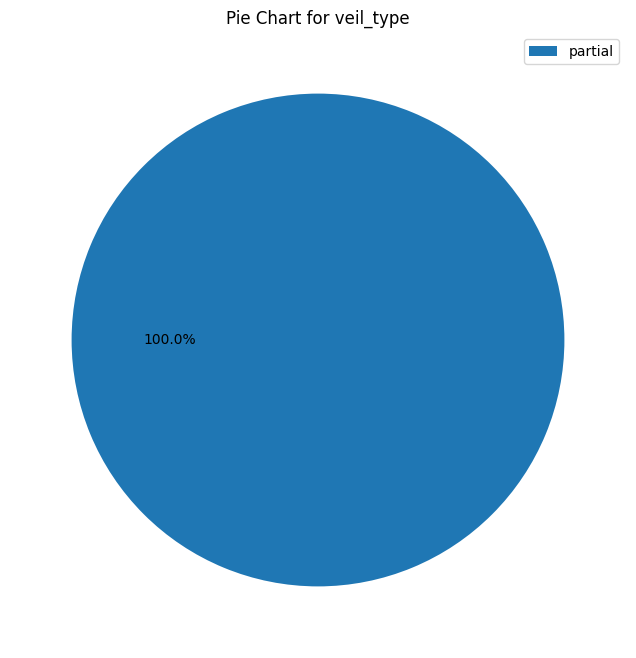

In [246]:
kolonne = 'veil_type'

plt.figure(figsize=(8,8))
plt.pie(df[kolonne].value_counts(), autopct = '%1.1f%%')
plt.legend(labels = df[kolonne].value_counts().index, loc ='upper right')
plt.title('Pie Chart for '+ kolonne)

## UML

UML:

1. EDA
2. Clean the data
3. Visualisations
4. Clustering (Dimensionality reduction (PCA/SVD))
5. Matrix (Her skal man labelencode)
6. Define your function  - Create interface


In [247]:
# Importing relevant liberies
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics.pairwise import cosine_similarity

In [248]:
df2uml = df.copy() # Making a copy of the original dataframe

## Introduction: The thought proces behind the UML-part

##### **Encoding, Dimensionality reduction and Clustering**

The thought behind the performed tasks in the following sections is to use Unsupervised Machine Learning (UML) techniques to gain an insight into our data. We want to see if we can find any patterns in the data, and if we can use these patterns to make a APP, that can show exploratory data analysis (EDA) to the user, based upon similar mushrooms. For this purpose we will use the following UML techniques:

1. Since our data is categorical, without hieracical order, we have to encode the data using OneHotEncoder.

2. After encoding we decide to reduce the dimensionality of the data using Principal Component Analysis (PCA).

3. Once we've reduced the dimensionality, we cluster the data based on K-Means clustering, to see if we can find any patterns in the data.

Based upod the clustering, we'll take a dive into yet another round of EDA, to gain a better understanding of the data.

##### **Develping a buisness application**
The idea of the application is to let the user (from a drop-down menu) select various features observable by eye, ear and nose of a mushroom the user has encounted. If the perticular mushroom the user has found is matching a mushroom in our database, the application will find 5 similar mushrooms based upon cosine similarity and present the user with characteristica of the 5 similar mushrooms. Afterwards the application will select the 1 mushroom most similar to the one selected by the user and present the user with exploratory figures showing severeal characteristics of mushrooms in the same cluster at the selected mushroom.

To be able to do this, we have to:
1. Create a code which lets the user pick several characteristics of a found mushroom. 
2. Using cosine simelarity find the 5 most similar to the user-selected mushroom.
3. Present the user with the 5 most similar mushrooms.
4. Using the most similar mushroom, find the cluster the mushroom belongs to.
5. Present the user with exploratory figures of the cluster the mushroom belongs to.



## Encoding

As described in the above introduction, we'll have to encode our data since every feature is categorical, and have no hieracical order. The 2 presented encoding techniques are:
1. OneHotEncoder
2. LabelEncoder




**LabelEncoder** will transform the features into integers, which, if used for as numbers, would give categories a hieracical order. For instance if using LabelEncoder on colors like *Green* , *Red* and *yellow* would give values **0 - 1 - 2** for *Green* , *Red* and *yellow* respectively. This would be interpreted as the fact that *yellow* is 'better' than *Red* and *Green*, which is not our intention. Common application for the LabelEncoder is to encode af string of text, which could be used for indexes in a DataFrame or a list, to later inverse-transform back to text.

Insted we use **OneHotEncoder**, which will create a new column for each unique category of every feature, and assign a 1 if the observation is in the category, and a 0 if not. This will give us a new dataframe with the amount of columns equal to the amount of categories in the feature. This will, for our dataset, give us a dataframe with 119 columns, which is a lot, but we'll reduce the dimensionality in the next section.



In [249]:
# Encoder
ohe = OneHotEncoder(sparse=False) # OneHotEncoder (OHE) is initialized. OHE will create a lot of new columns matching the number of 
# unique categories within our data.
# We set Sparse to False, because we want to return a numpy array instead of a sparse matrix. The reason being that PCA reqeuires a dense 
# matrix, even though Sparse matrices are more efficient in terms of memory usage.

######### Transforming the data ############
df_encoded = ohe.fit_transform(df2uml) # This line of code fits the OneHotEncoder to the data and transforms it giving us a numpy array with the encoded data.

In [250]:
# Checking the shape of the encoded data
df_encoded.shape

(8124, 119)

As can be seen from the shape of the now encoded dataframe, we have 119 columns with 1's and 0's, the reason for this is that we have 119 unique categories in our dataset. 

### Dimensionality reduction

Since we have 119 columns, its hard to get a grasp of the data and visualize it. Therefore we'll reduce the dimensionality of the data using Principal Component Analysis (PCA). This will reduce the dimensionality of the data to the pre-specified number of dimensioins/components we want. 

PCA is a technique that is used to reduce the dimensionality of a dataset. It does so by creating new features, which are linear combinations of the original features. The new features are called principal components, and are ordered by the amount of variance they explain in the data. The first principal component explains the most variance, the second principal component explains the second most variance, and so on.

For illustration purposes we fist we costruct a PCA with 119 components, to illustrate the fact that 119 components is capturing all the information of the dataset, as can be seen from the explained variance ratio. The explained variance ratio is the amount of variance explained by each of the selected components. 

In [251]:
pca = PCA(n_components=119) # PCA initilisation with 119 components. 

###### Fit and transfor the OneHotEncoded dataset ######
df_encoded_pca = pca.fit_transform(df_encoded)

In [252]:
# This code gives us the explained variance ratio of the individual components, sums it accros all components and rounds it to 1 decimal.
pca.explained_variance_ratio_.sum().round(1)

1.0

As can be seen, the 119 components explain 100% of the variation within our data, which is not surprising, since we have 119 components, and therefore 119 linear combinations of the original features. This is only done for illustration purposes, and we'll reduce the dimensionality to 2 components, to be able to visualize the data, later on.

<br><br> 

The following plot shows how much each individual of the 119 components explains.

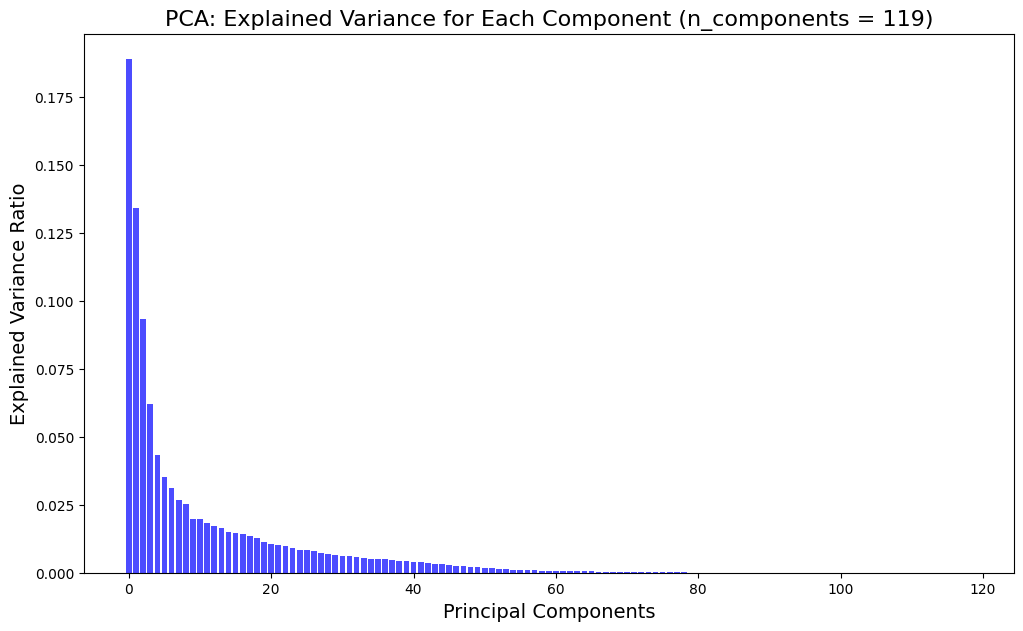

In [253]:
explained_variance = pca.explained_variance_ratio_ ## This code gives us the explained variance ratio of the individual components.

### Plotting the figure:
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, color='blue') # Plots 1-119 bars on the x-axis with the explained variance on the y-axis.
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component (n_components = 119)', fontsize=16)
plt.show()

At can be seen from the plot of the individual components, there's a quick decay in the explained variance ratio, and after 10 components, the explained variance ratio is below 2,5% each. But also that the 2 first components explain around 30% of the variation, which is not a lot, but we'll use it for visualization purposes.

To illustrate this point higligted in the plot further, the following loop will print out the cumulative explained variance for increasing number of components to a max of 20 components.

In [345]:
# This for-loop will print the cumulative explained variance ratio for an increasing number of components form 1 to 19 components.
for i in range(1, 21):

    pca = PCA(n_components=i) # PCA initilisation with i components.
    
    df_encoded_pca = pca.fit_transform(df_encoded) # Fit and transform the OneHotEncoded dataset
    
    percentage = pca.explained_variance_ratio_.sum() * 100 # Calculate the cumulative explained variance ratio
    
    formatted_percentage = "{:.2f}%".format(percentage) # Format the cumulative explained variance ratio to 2 decimals
    
    print(f"{formatted_percentage} is explained by {i} components") # Print the cumulative explained variance ratio for i components


18.89% is explained by 1 components
32.31% is explained by 2 components
41.67% is explained by 3 components
47.89% is explained by 4 components
52.21% is explained by 5 components
55.75% is explained by 6 components
58.86% is explained by 7 components
61.52% is explained by 8 components
64.06% is explained by 9 components
66.05% is explained by 10 components
68.04% is explained by 11 components
69.85% is explained by 12 components
71.57% is explained by 13 components
73.21% is explained by 14 components
74.72% is explained by 15 components
76.19% is explained by 16 components
77.61% is explained by 17 components
78.97% is explained by 18 components
80.26% is explained by 19 components
81.38% is explained by 20 components


Here again it's obvious that adding more components after 10 won't make much sense. But for Visualization purposes we'll use 2 components, since it explains around 30% of the variation, and we'll be able to visualize the data in 2 dimensions. If not for visualization purposes, we would use 10 components, since it explains around 66% of the variation, and therefore would be a good choice for dimensionality reduction, since adding more components afterwards would not explain much more of the variation.

#### PCA with 2 components plotted

The reason for chosing 2 components was to be able to visualize the data in 2 dimensions. The following plot shows the 2 components plotted against each other. 

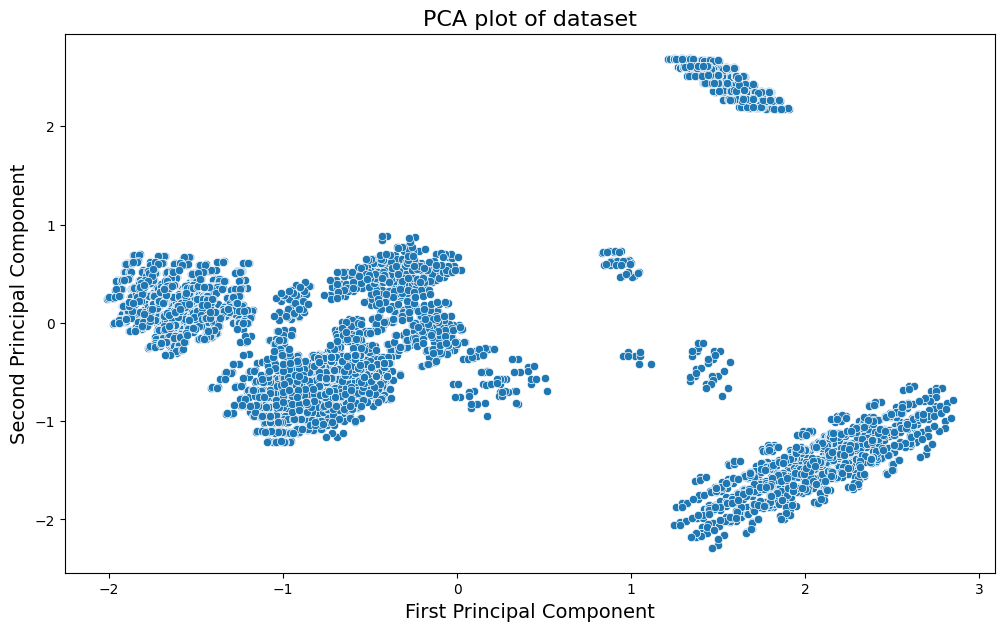

In [341]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=df_encoded_pca[:,0], y=df_encoded_pca[:,1])

plt.title('PCA plot of dataset', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.show()

**MANGLER FORKLARING ELLER OBSERVATIONER**

#### Heatmap of PCA

Because we've chosen 2 dimensions, a heat map will show which features are most important for each of the 2 components. 
<br><br>

A more complete way to do this, would have been to sum up the 119 columns into the original 23 features, and then plot the heatmap. This would have given us a better understanding of which features are most important for each of the 2 components, but since we've used a OneHotEncoder, every categorical feature would be present in the heatmap.

In [314]:
######### Creating column names for the encoded data ############
colnms = list(itertools.chain(*ohe.categories_)) # Makes a list of the column names as strings for the encoded data.

######### Creating a dataframe of the encoded data with column names ############
data_to_pca = pd.DataFrame(df_encoded, columns=colnms)

In [315]:
pca = PCA(n_components=2) # PCA for 2 components
df_encoded_pca = pca.fit_transform(data_to_pca) # Fit og transform PCA til vores data
df_encoded_pca.shape # Shape of the transformed data

(8124, 2)

The shape now shows we have 2 components instead of 119 features.

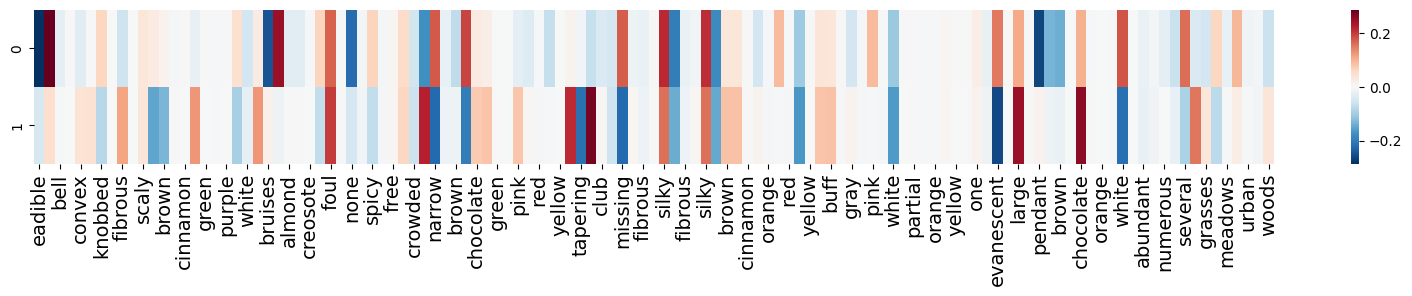

In [323]:
###### Plotting the heat map ######
plt.figure(figsize=(20,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_pca.columns), annot=False, center = 0, cmap='RdBu_r') # Plotting the heatmap
plt.xticks(fontsize=14)
plt.show()

**MANGLER FORKLARING PÅ HEATMAP**

## Clustering (K-Means)

Now that our data is reduced to 2 dimensions, we can move on to perform a K-Means clustering on our data. To determine the correct number of clusters, we'll use an **elbow plot**.

**The Elbow-plot** shows the sum of squared distances between each observation and its closest cluster center. The idea is to find the number of clusters where the sum of squared distances decreases significantly.

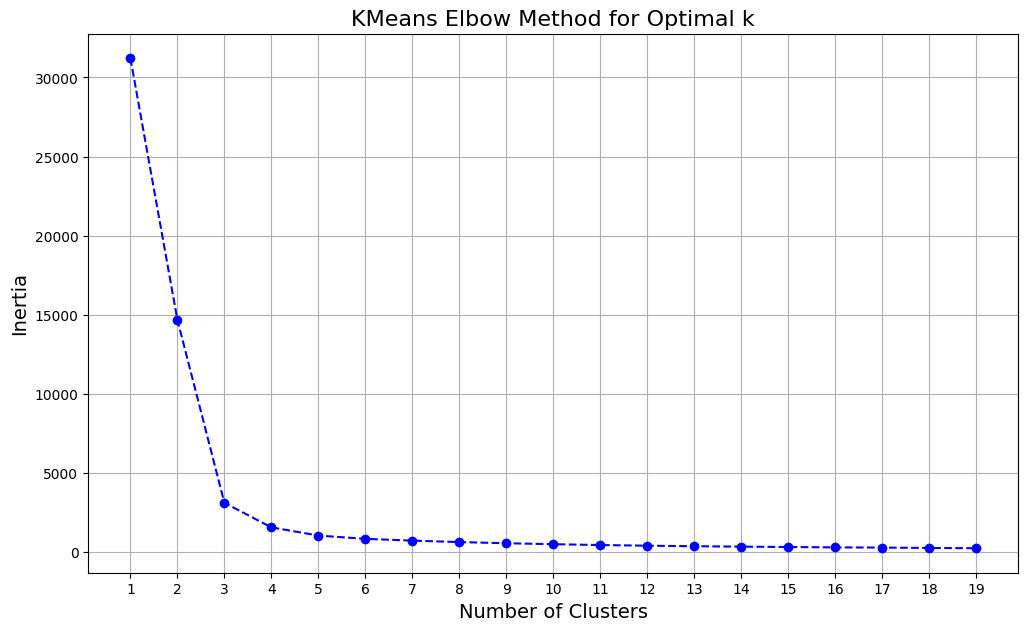

In [324]:
# Visualisation of the Elbow method!
clusters = [] # Empty list for inertia values

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_encoded_pca) # A for loop which runs through 1 to 20 clusters (n_cluster=i) and saves the Inertia.
    clusters.append(kmeans.inertia_) # Appending the inertia values to the empty list.

##### Plotting the Elbow Method #####
plt.figure(figsize=(12,7))
plt.plot(range(1, 20), clusters, marker='o', linestyle='--', color='blue')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('KMeans Elbow Method for Optimal k', fontsize=16)
plt.grid(True)
plt.xticks(range(1, 20))
plt.show()

 In our case, the elbow plot shows that the sum of squared distances decreases significantly from 2 to 3 clusters, but not so much from 3 to 4 clusters and afterwards.  Therefore, based upon the Elbow-method, we chose 3 clusters. One could argue that 4 clusters would be just (or more) efficient.

In [325]:
#### This code will run KMeans with 3 clusters and save the predicted labels in a new column called 'labels' ####

kmeans = KMeans(n_clusters=3, random_state=0) # KMeans is initialized with 5 clusters.

predicted = kmeans.fit_predict(df_encoded_pca) # KMeans is fitted to the data and the predicted labels are saved in a new variable called predicted.

df_kmeans = df.copy() # A copy of the original dataframe is made.

df_kmeans['labels'] = predicted # The predicted labels are saved in a new column called 'labels'.

After using the K-Means clustering algorithm, the head of the data is showed to see if the clusters are made correctly.

In [260]:
df_kmeans.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,labels
0,poisonous,convex,smooth,brown,bruises,pudgent,free,close,narrow,black,...,white,white,partial,white,one,pendant,black,scattered,urban,1
1,eadible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,white,white,partial,white,one,pendant,brown,numerous,grasses,1
2,eadible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,white,white,partial,white,one,pendant,brown,numerous,meadows,1
3,poisonous,convex,scaly,white,bruises,pudgent,free,close,narrow,brown,...,white,white,partial,white,one,pendant,black,scattered,urban,1
4,eadible,convex,smooth,gray,no,none,free,crowded,broad,black,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,1


### Visualizations of the clusters

The purposee of the following visualizations is to get a better understanding of the clusters. The plots chosen are based upon significant differences between the clusters in relation to individual features, and therefore the plots are chosen to illustrate these differences.

#### Cluster Vs. Class (poisenous/edible) - Scatterplot

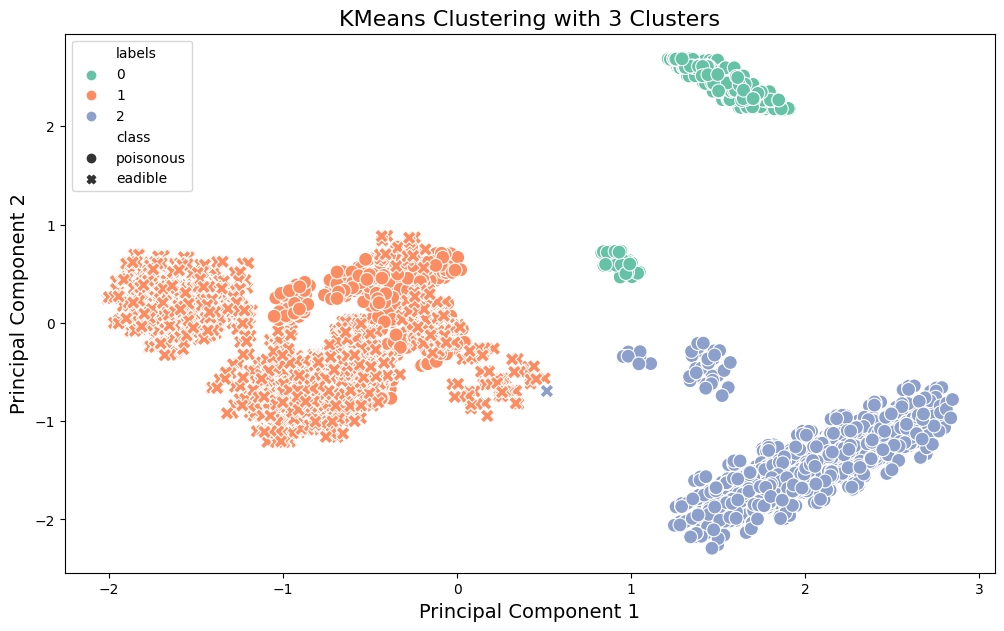

In [333]:
plt.figure(figsize=(12,7))

sns.scatterplot(x=df_encoded_pca[:,0], y=df_encoded_pca[:,1], hue=df_kmeans['labels'], style = df_kmeans['class'] ,palette='Set2', s=100) 
# Scatterplot of the PCA transformed data with the predicted labels. Style is set to poisonous or edible, so o is posionous and x is edible.
plt.title('KMeans Clustering with 3 Clusters', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend( loc=2) # Legend is placed in the upper left corner.

plt.show()


From the scatterplot **MANGLER MERE**

#### Cluster Vs. Class (poisenous/edible) - Barplot

<Axes: xlabel='labels', ylabel='count'>

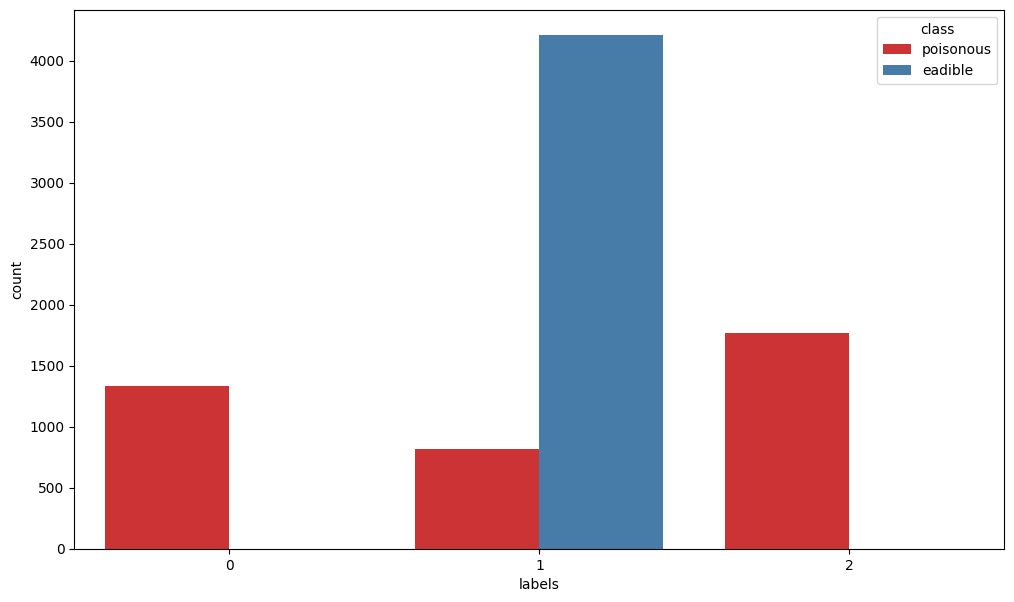

In [262]:
plt.figure(figsize=(12,7))
sns.countplot(x=df_kmeans['labels'], hue = df_kmeans['class'], palette='Set1')

**MANGLER FORKLARING**

#### Cluster Vs. Ring Type (pendant/evanescent/flaring/large/none) - Barplot

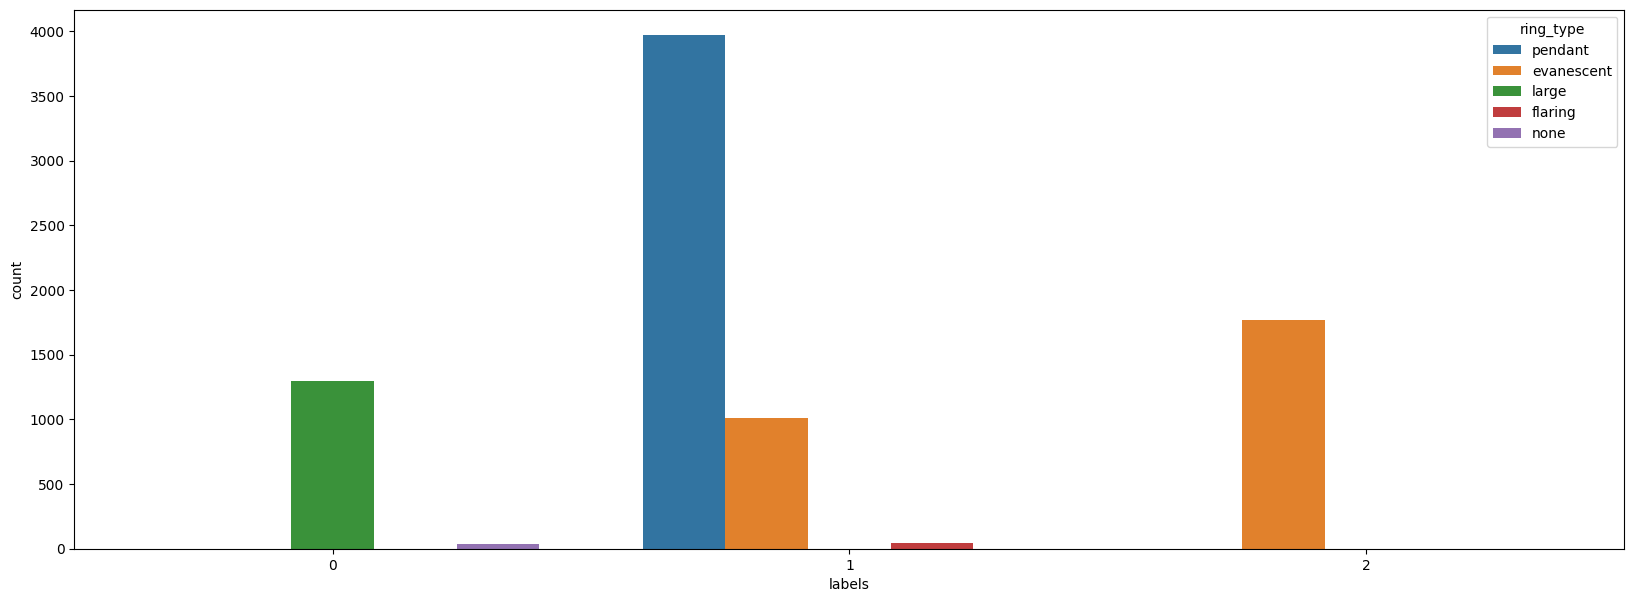

In [343]:
plt.figure(figsize=(20,7))
sns.countplot(x=df_kmeans['labels'], hue=df_kmeans["ring_type"])

plt.show()

**MANGLER FORKLARING**

#### Cluster Vs. Ring number (one/two/none) - Barplot

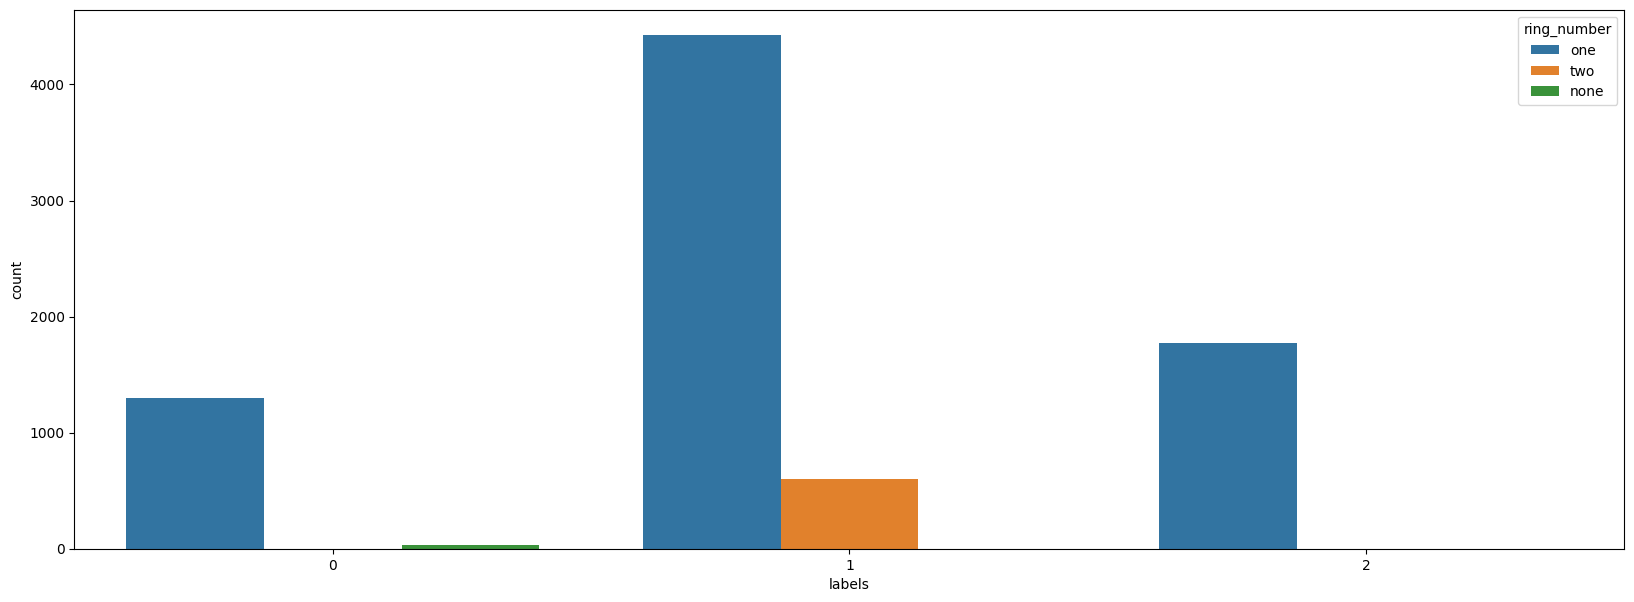

In [265]:
plt.figure(figsize=(20,7))
sns.countplot(x=df_kmeans['labels'], hue=df_kmeans["ring_number"])
plt.show()


**MANGLER FORKLARING**

#### Cluster Vs. Gill size (Narrow/Broad) - Barplot

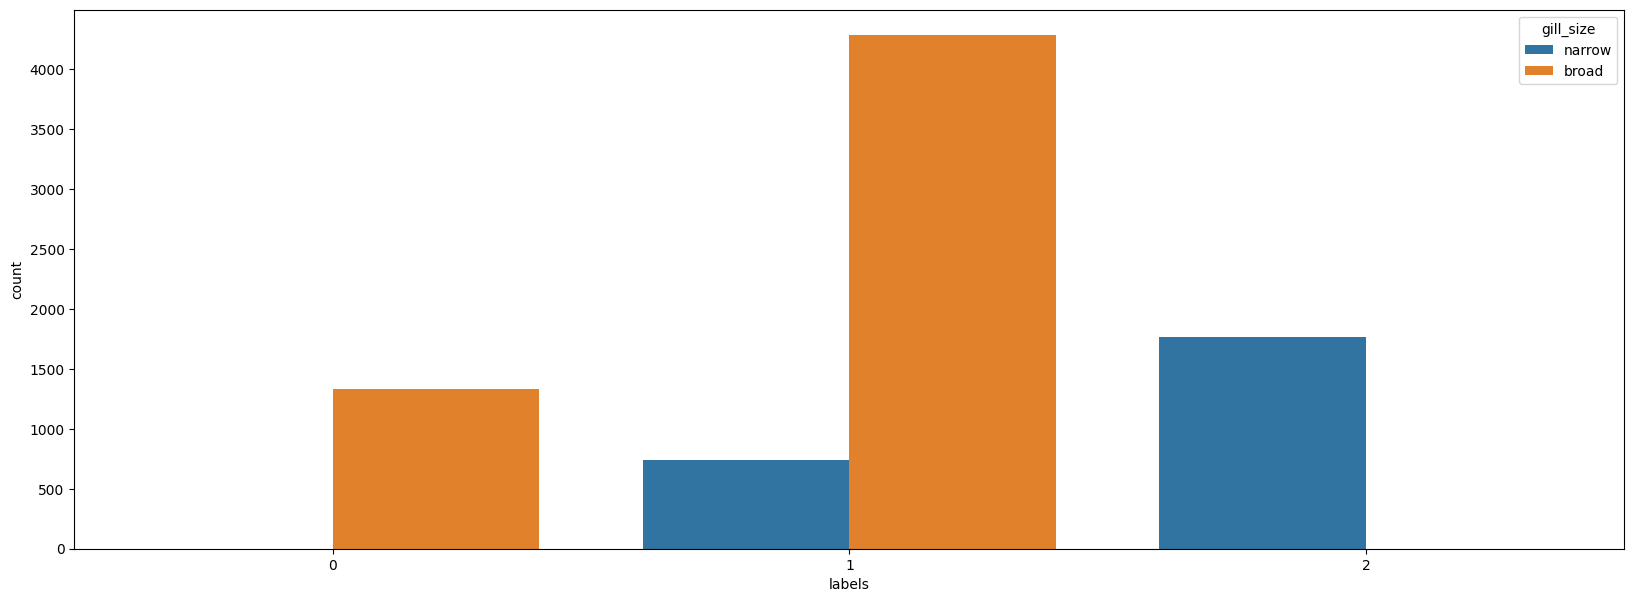

In [266]:
plt.figure(figsize=(20,7))
sns.countplot(x=df_kmeans['labels'], hue=df_kmeans["gill_size"])

plt.show()

**MANGLER FORKLARING**

#### Cluster Vs. Gill Spacing (Closed/Crowded) - Barplot

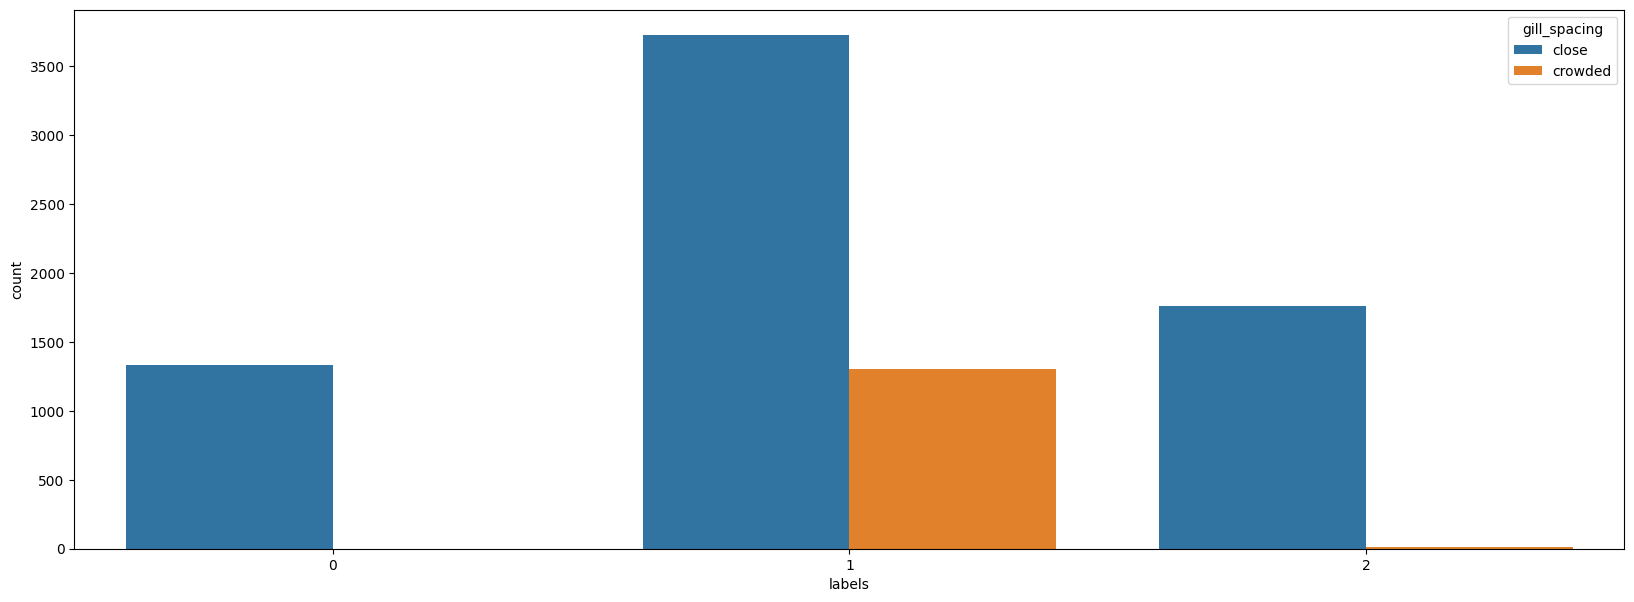

In [267]:
plt.figure(figsize=(20,7))
sns.countplot(x=df_kmeans['labels'], hue=df_kmeans["gill_spacing"])
plt.show()


**MANGLER FORKLARING**

#### Cluster Vs. Bruises (Yes/no) - Barplot

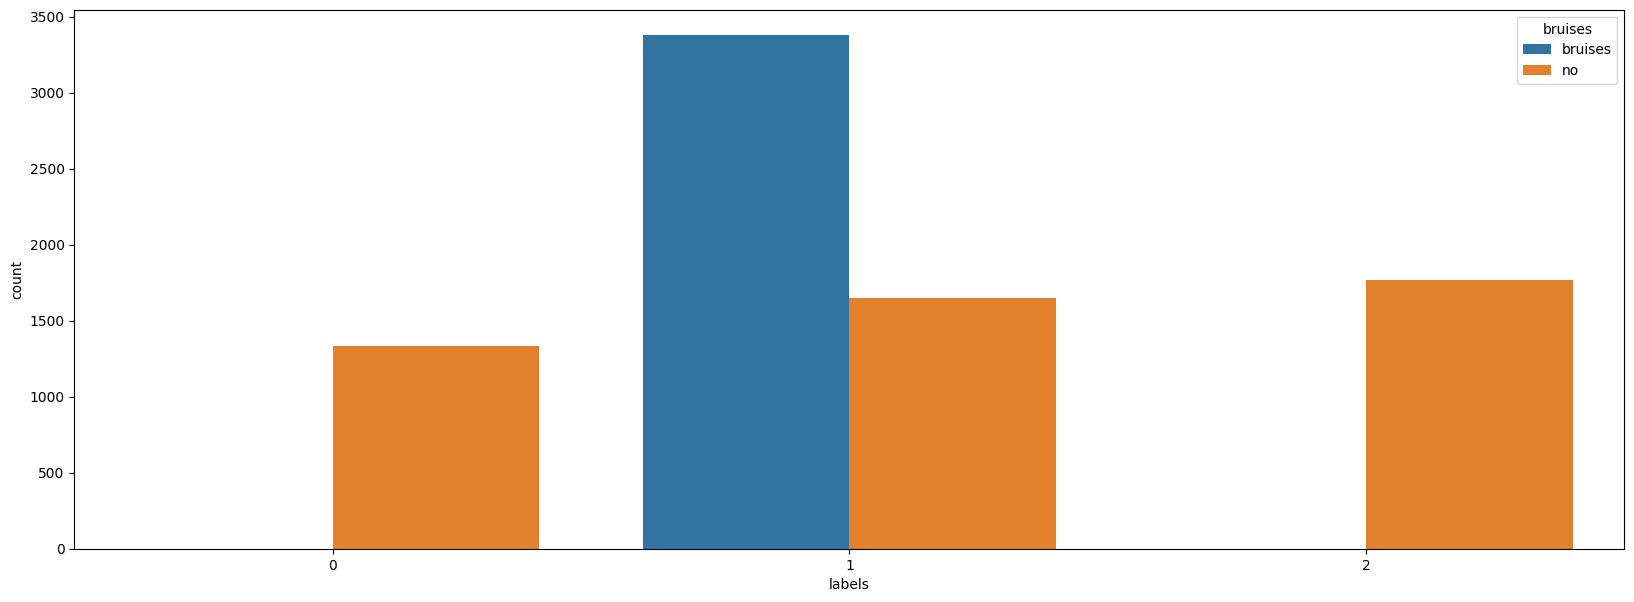

In [268]:
plt.figure(figsize=(20,7))
sns.countplot(x=df_kmeans['labels'], hue=df_kmeans["bruises"])

plt.show()

**MANGLER FORKLARING**

# For the APP

The following lines of code is to initilise the streamlit app by creating a working pipeline for the app to run.

In [296]:
# row_count = df_kmeans[(df_kmeans['cap_shape'] == 'knobbed') & (df_kmeans['cap_surface'] == 'smooth') & (df_kmeans['cap_color']=='brown') & 
#           (df_kmeans['bruises'] == 'no') & (df_kmeans['odor'] == 'none') & (df_kmeans['gill_attachment'] == 'free') & 
#           (df_kmeans['gill_spacing'] == 'close') & (df_kmeans['gill_size'] == 'broad') & (df_kmeans['gill_color'] == 'brown') &
#           (df_kmeans['stalk_shape'] == 'tapering') & (df_kmeans['stalk_root'] == 'bulbous') & (df_kmeans['stalk_surface_above_ring'] == 'smooth') &
#           (df_kmeans['stalk_surface_below_ring'] == 'smooth') & (df_kmeans['stalk_color_above_ring'] == 'brown') &
#           (df_kmeans['stalk_color_below_ring'] == 'brown') & (df_kmeans['veil_type'] == 'partial') & (df_kmeans['veil_color'] == 'brown') &
#           (df_kmeans['ring_number'] == 'one') & (df_kmeans['ring_type'] == 'pendant') & (df_kmeans['spore_print_color'] == 'brown') &
#           (df_kmeans['population'] == 'several') & (df_kmeans['habitat'] == 'woods')]

# The above .


row_count = df_kmeans[(df_kmeans['cap_shape'] == 'knobbed') & (df_kmeans['cap_color']=='white') & (df_kmeans['habitat']=='grasses')] # This is a filter for the selected features


if row_count.shape[0] == 0: # This if else statement is to check if the filter returns any mushrooms, if not, a mushroom with the selected features is not in our database.
    print("""
          This particular mushroom is not in our database.
          We're still expanding with new mushrooms every day, so please check back later!
          If you believe your found mushroom should be in our database, please modify your inputs and try again!
          """)
else: # If there's a match, we print out 5 matches and a comparison of the features.
    Selected_mushroom = row_count.iloc[:5,:]
    compi = Selected_mushroom.T
    compi['Comparison'] = compi['Comparison'] = compi.apply(lambda row: 'Different for some (or all) mushrooms' if row.nunique() > 1 else 'Same across all mushrooms', axis=1)
    # Compi is made to visualize if the selected features are the same or different for the 5 mushrooms.

    display('The described mushroom is matching the description of ' + str(row_count.shape[0]) + ' mushroom(s) within our database. A max of 5 is shown here:',  compi, 
          'To get some more information based upon your particular mushroom, please describe more features of your mushroom and try again!')

'The described mushroom is matching the description of 48 mushroom(s) within our database. A max of 5 is shown here:'

,6147,6203,6219,6366,6449,Comparison
class,eadible,eadible,eadible,eadible,eadible,Same across all mushrooms
cap_shape,knobbed,knobbed,knobbed,knobbed,knobbed,Same across all mushrooms
cap_surface,fibrous,smooth,smooth,fibrous,smooth,Different for some (or all) mushrooms
cap_color,white,white,white,white,white,Same across all mushrooms
bruises,no,no,no,no,no,Same across all mushrooms
odor,none,none,none,none,none,Same across all mushrooms
gill_attachment,free,free,free,free,free,Same across all mushrooms
gill_spacing,crowded,crowded,crowded,crowded,crowded,Same across all mushrooms
gill_size,broad,broad,broad,broad,broad,Same across all mushrooms
gill_color,gray,gray,gray,pink,gray,Different for some (or all) mushrooms


'To get some more information based upon your particular mushroom, please describe more features of your mushroom and try again!'

## Cosine similarity

The reason for using cosine similarity is to se similarity between the user-selected mushroom and the mushrooms within the database which share the most similar features.

**Cosine Similarity** is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. The cosine of 0° is 1, and it is less than 1 for any other angle. It is thus a judgement of orientation and not magnitude: two vectors with the same orientation have a cosine similarity of 1, two vectors at 90° have a similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude.

For this exercise, using 2 PCA components, Euclidian distance and cosine similarity will most likely give the same result, but for the purpose of the app, we'll use cosine similarity.

In [270]:
matrix = cosine_similarity(df_encoded_pca) # df_encoded_pca is our encoded dataframe applied with PCA across all features. For the pca we used 10 components.

In [271]:
matrix_test = pd.DataFrame(matrix) # Fit the matrix into a dataframe

In [272]:
inn = Selected_mushroom.index[0] # Selected_mushroom is our 5 mushrooms that matches the features we selected. We take the first one (there should be only one!) and store the index

In [273]:
similarity_selection = matrix_test.iloc[inn] # The above index is then used to find the selected mushroom in our cosine similarity matrix.

In [274]:
index_selection = similarity_selection.nlargest(6).iloc[1:].index 
# We take the 5 largest similarities and store the index of those. We take the 5 largest because the first one is the mushroom itself.

In [275]:
selection_datafframe = df_kmeans.iloc[index_selection] # We use the index to find the 5 mushrooms in our original dataframe (df_kmeans) which includes cluster labels

In [288]:
display('The most similar mushrooms, based on Cosine similarity across all features, are:' , selection_datafframe.T)
# This is a code to show the 5 most similar mushrooms based on cosine similarity across all features. We transpose the dataframe to make it easier to read.

'The most similar mushrooms, based on Cosine similarity across all features, are:'

,7361,1661,7513,609,1887
class,eadible,eadible,eadible,eadible,poisonous
cap_shape,knobbed,convex,convex,flat,flat
cap_surface,fibrous,fibrous,smooth,fibrous,scaly
cap_color,gray,gray,gray,gray,white
bruises,no,no,no,no,bruises
odor,none,none,none,none,pudgent
gill_attachment,free,free,free,free,free
gill_spacing,crowded,crowded,crowded,close,close
gill_size,broad,broad,broad,narrow,narrow
gill_color,white,pink,gray,brown,brown


In [307]:
print("The 5 most similar mushrooms lie in " + str(selection_datafframe['labels'].nunique()) + " clusters, more accuratly in the cluster(s) -->" + str(selection_datafframe['labels'].unique()) + """ 
        Based on the most similar mushroom, which have cluster """ + 
        str(selection_datafframe['labels'].iloc[0]) + 
        " we've conducted the following summary of information about the cluster:")
# We print out the number of clusters the 5 most similar mushrooms lie in, and which clusters they lie in.
# The cluster of the MOST similar mushroom (based upon cosine similarity) is then used to filter our dataset, to show EDA for that cluster.

The 5 most similar mushrooms lie in 1 clusters, more accuratly in the cluster(s) -->[1] 
        Based on the most similar mushroom, which have cluster 1 we've conducted the following summary of information about the cluster:


In [278]:
labels = selection_datafframe['labels'].iloc[0]
# Select the cluster label of the most similar mushroom

In [279]:
selection_df_eda = df_kmeans[df_kmeans['labels'] == labels]
# Filter our dataset based upon the cluster label from code above.

## Visualization of the cluster containing the selected mushroom

**MANGLER EN DEL PLOTS**

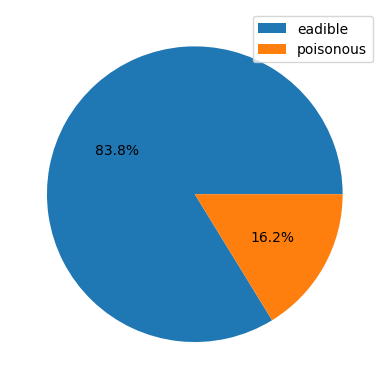

In [281]:
viz_selection = 'class'
plt.pie(selection_df_eda[viz_selection].value_counts(), autopct = '%1.1f%%')
plt.legend(labels = selection_df_eda[viz_selection].value_counts().index, loc ='upper right')